## 1. Data Splitting

In [1]:
import pandas as pd
import gzip

# Read from the GZ file
with gzip.open('cleaned_crime_data.csv.gz', 'rt') as f:
    df = pd.read_csv(f)

# Display the first 10 rows of the dataset
df.head(10)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,...,"Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","Premis Desc_VEHICLE, PASSENGER/TRUCK",Premis Desc_VETERINARIAN/ANIMAL HOSPITAL,Premis Desc_VIDEO RENTAL STORE,Premis Desc_VISION CARE FACILITY*,Premis Desc_WAREHOUSE,Premis Desc_WATER FACILITY,Premis Desc_WEBSITE,Premis Desc_YARD (RESIDENTIAL/BUSINESS),Holiday
0,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,NaN,...,False,False,False,False,False,False,False,False,False,0
1,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,1822 1402 0344,...,False,False,False,False,False,False,False,False,False,0
2,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,0344 1251,...,False,False,False,False,False,False,False,False,False,0
3,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),0325 1501,...,False,False,False,False,False,False,False,False,False,0
4,08/18/2022 12:00:00 AM,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,1822 1501 0930 2004,...,False,False,False,False,False,False,False,False,False,0
5,04/04/2023 12:00:00 AM,2020-12-01,2300,18,Southeast,1826,2,354,THEFT OF IDENTITY,1822 0100 0930 0929,...,False,False,False,False,False,False,False,False,False,0
6,04/04/2023 12:00:00 AM,2020-07-03,900,1,Central,182,2,354,THEFT OF IDENTITY,0930 0929,...,False,False,False,False,False,False,False,False,False,1
7,07/22/2022 12:00:00 AM,2020-05-12,1110,3,Southwest,303,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
8,04/28/2023 12:00:00 AM,2020-12-09,1400,13,Newton,1375,2,354,THEFT OF IDENTITY,0100,...,False,False,False,False,False,False,False,False,False,0
9,12/31/2020 12:00:00 AM,2020-12-31,1220,19,Mission,1974,2,624,BATTERY - SIMPLE ASSAULT,0416,...,False,False,False,False,False,False,False,False,False,0



Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
349    0.000006
830    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
113    0.000007
445    0.000003
884    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64


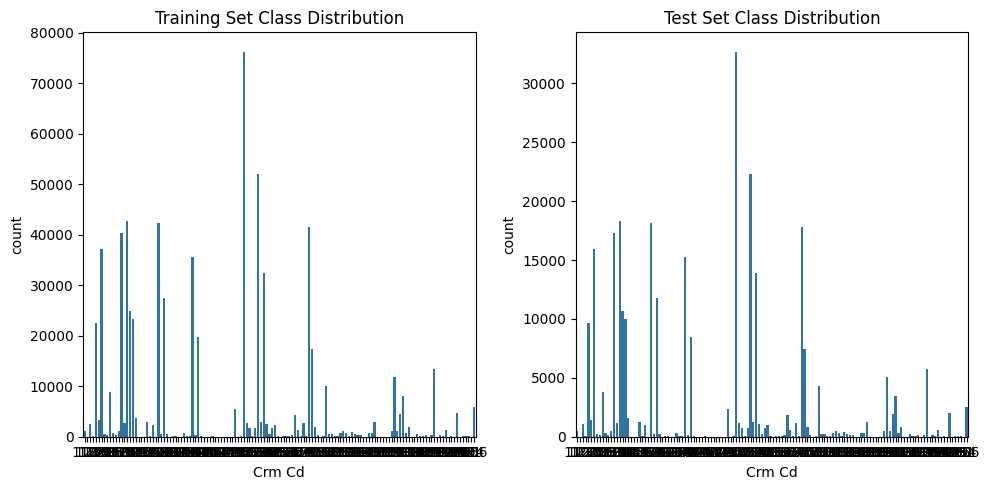

In [1]:
import pandas as pd
import gzip
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def prepare_data(df):
    # Select features for modeling
    feature_cols = [
        'AREA',
        'Rpt Dist No',
        'Premis Desc_VEHICLE STORAGE LOT (CARS, TRUCKS, RV\'S, BOATS, TRAILERS, ETC.)',
        'Premis Desc_VEHICLE, PASSENGER/TRUCK',
        'Premis Desc_VETERINARIAN/ANIMAL HOSPITAL',
        'Premis Desc_VIDEO RENTAL STORE',
        'Premis Desc_VISION CARE FACILITY*',
        'Premis Desc_WAREHOUSE',
        'Premis Desc_WATER FACILITY',
        'Premis Desc_WEBSITE',
        'Premis Desc_YARD (RESIDENTIAL/BUSINESS)',
        'Holiday'
    ]
    
    # Prepare X (features) and y (target)
    X = df[feature_cols]
    y = df['Crm Cd']
    
    # Filter out classes with fewer than 2 instances
    class_counts = y.value_counts()
    valid_classes = class_counts[class_counts >= 2].index
    X = X[y.isin(valid_classes)]
    y = y[y.isin(valid_classes)]
    
    return X, y

# 2. Split data and show statistics
def split_and_show_stats(X, y, test_size=0.3, random_state=42):
    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    # Calculate and display statistics
    print("\nData Split Statistics:")
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    print("\nClass distribution in full dataset:")
    print(y.value_counts(normalize=True))
    
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    
    return X_train, X_test, y_train, y_test

# 3. Create cross-validation splits
def create_cv_splits(X_train, y_train, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    return skf

# 4. Preprocess features
def preprocess_features(X_train, X_test):
    # Create scaler
    scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform test data
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler

# Main execution
def main():
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train)

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()

## 2. Experiment with k-NN Classification Model




## 3. Experiment with Naïve Bayes Classification Model



## 4. Experiment with Logistic Regression Classification Model




Data Split Statistics:
Total samples: 973554
Training samples: 681487 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Crm Cd
510    0.111932
624    0.076223
330    0.062601
354    0.062195
740    0.060916
         ...   
830    0.000006
904    0.000005
906    0.000004
884    0.000004
445    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in training set:
Crm Cd
510    0.111932
624    0.076223
330    0.062600
354    0.062195
740    0.060915
         ...   
349    0.000006
830    0.000006
445    0.000004
884    0.000004
906    0.000004
Name: proportion, Length: 138, dtype: float64

Class distribution in test set:
Crm Cd
510    0.111933
624    0.076222
330    0.062602
354    0.062195
740    0.060918
         ...   
113    0.000007
445    0.000003
884    0.000003
904    0.000003
906    0.000003
Name: proportion, Length: 138, dtype: float64


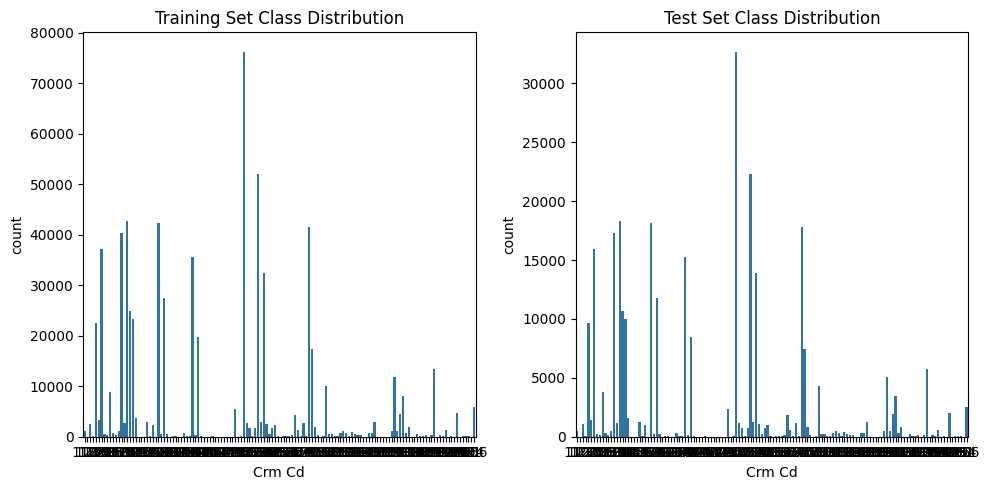

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer  # Import SimpleImputer
from sklearn.pipeline import Pipeline  # Import Pipeline
import numpy as np  # Import numpy
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

# Main execution
def main():
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train, n_splits=3)  # Adjust n_splits to 3

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()

# 1. Setup and Cross-Validation
log_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Add imputer to handle NaN values
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Evaluation Metrics Calculation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    y_val_prob = log_reg.predict_proba(X_val_fold)
    
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted', zero_division=0))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    
    # Ensure y_val_prob has the correct dimensions
    if y_val_prob.shape[1] == len(np.unique(y_val_fold)):
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))
    else:
        roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob[:, 0], multi_class='ovr'))

# 3. Performance Analysis
print("Cross-Validation Performance Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# 4. Best Model Selection
# Refit the model on the entire training set
log_reg.fit(X_train_scaled, y_train)

# 5. Final Test Evaluation
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)

final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
final_recall = recall_score(y_test, y_test_pred, average='weighted')
final_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Ensure y_test_prob has the correct dimensions
if y_test_prob.shape[1] == len(np.unique(y_test)):
    final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')
else:
    final_roc_auc = roc_auc_score(y_test, y_test_prob[:, 0], multi_class='ovr')

print("\nFinal Test Performance Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"AUC ROC: {final_roc_auc:.4f}")

### Report of Logistic Regression

Cross-Validation Performance Metrics:
Accuracy: 0.8941 ± 0.0007
Precision: 0.8944 ± 0.0006
Recall: 0.8941 ± 0.0007
F1-Score: 0.8933 ± 0.0007
AUC ROC: 0.9489 ± 0.0003

Final Test Performance Metrics:
Accuracy: 0.8936
Precision: 0.8940
Recall: 0.8936
F1-Score: 0.8928
AUC ROC: 0.9490

Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.94      0.91    174749
           2       0.90      0.83      0.86    118840

    accuracy                           0.89    293589
   macro avg       0.90      0.88      0.89    293589
weighted avg       0.89      0.89      0.89    293589



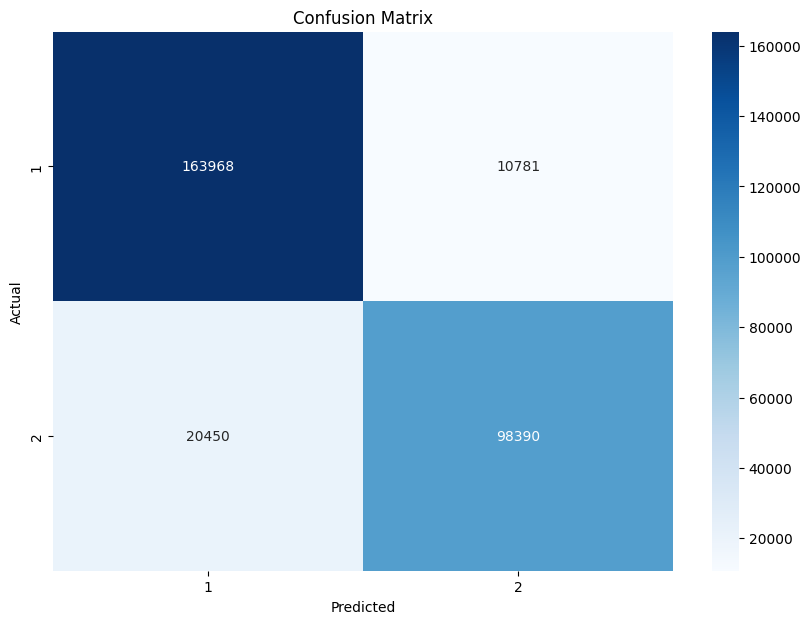

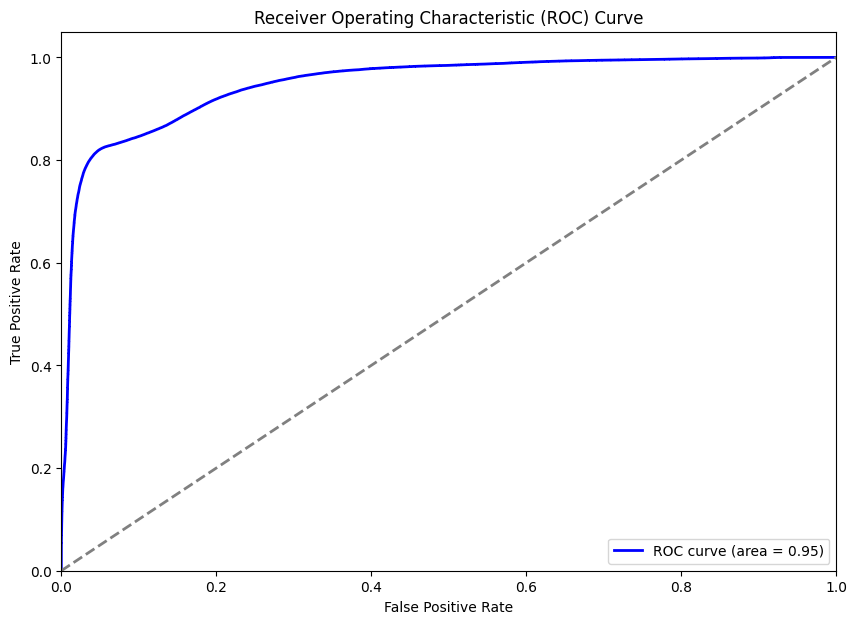

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

# 1. Setup and Cross-Validation
log_reg = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Evaluation Metrics Calculation
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in cv.split(X_train_scaled, y_train):
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    log_reg.fit(X_train_fold, y_train_fold)
    y_val_pred = log_reg.predict(X_val_fold)
    y_val_prob = log_reg.predict_proba(X_val_fold)[:, 1]
    
    accuracy_scores.append(accuracy_score(y_val_fold, y_val_pred))
    precision_scores.append(precision_score(y_val_fold, y_val_pred, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_val_pred, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_val_pred, average='weighted'))
    roc_auc_scores.append(roc_auc_score(y_val_fold, y_val_prob, multi_class='ovr'))

# 3. Performance Analysis
print("Cross-Validation Performance Metrics:")
print(f"Accuracy: {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"Precision: {np.mean(precision_scores):.4f} ± {np.std(precision_scores):.4f}")
print(f"Recall: {np.mean(recall_scores):.4f} ± {np.std(recall_scores):.4f}")
print(f"F1-Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")
print(f"AUC ROC: {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")

# 4. Best Model Selection
# Refit the model on the entire training set
log_reg.fit(X_train_scaled, y_train)

# 5. Final Test Evaluation
y_test_pred = log_reg.predict(X_test_scaled)
y_test_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='weighted')
final_recall = recall_score(y_test, y_test_pred, average='weighted')
final_f1 = f1_score(y_test, y_test_pred, average='weighted')
final_roc_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr')

print("\nFinal Test Performance Metrics:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-Score: {final_f1:.4f}")
print(f"AUC ROC: {final_roc_auc:.4f}")

# 6. Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# 7. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob, pos_label=2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 5. Experiment with SVM Classification Model



## 6. Experiment with Decision Tree (DT) Classification Model



## 7. Experiment with Back Propagation Neural Network (BPNN) Classification Model